# Review of Statistics

This notebook shows some basic statistics needed for a course in financial econometrics.

It uses the Statistics package (built in) for descriptive statistics (averages, autocorrelations, etc) and the [Distributions](https://github.com/JuliaStats/Distributions.jl)  package for statistical distributions (pdf, cdf, etc).  For more stat functions, see the StatsBase package. (Not used here.)

## Load Packages and Extra Functions

In [1]:
using Dates, Statistics, DelimitedFiles, Distributions

include("jlFiles/printmat.jl")   #prettier matrix printing

printwhere (generic function with 1 method)

In [2]:
using Plots, LaTeXStrings

#pyplot(size=(600,400))           #use pyplot() or gr()
gr(size=(480,320))
default(fmt = :svg)

# Distributions

## Probability Density Function (pdf)

The cells below calculate and plot some pdfs. The Distributions package has many more distributions.

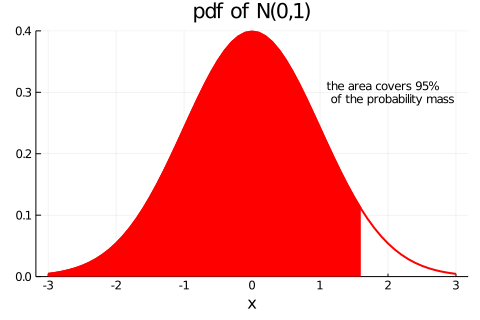

In [3]:
x  = -3:0.1:3
xb = x[x.<=1.645]

pdfx  = pdf.(Normal(0,1),x)       #calculate the pdf of a N(0,1) variable
pdfxb = pdf.(Normal(0,1),xb)

p1 = plot( x,pdfx,                        #plot pdf
           linecolor = :red,
           linewidth = 2,
           legend = nothing,
           ylims = (0,0.4),
           title = "pdf of N(0,1)",
           xlabel = "x",
           annotation = (1.1,0.3,text("the area covers 95%\n of the probability mass",:left,8)) )
plot!(xb,pdfxb,linecolor=:red,linewidth=2,legend=nothing,fill=(0,:red))    #plot area under pdf
display(p1)

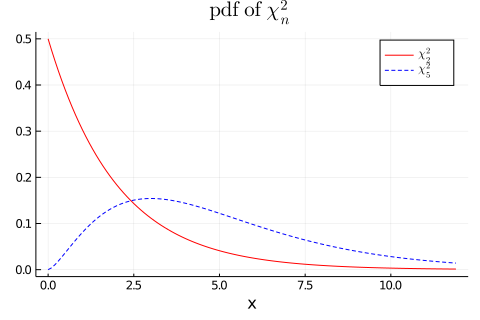

In [4]:
x  = 0.0001:0.1:12

pdf2  = pdf.(Chisq(2),x)
pdf5 =  pdf.(Chisq(5),x)

p1 = plot( x,[pdf2 pdf5],
           linecolor = [:red :blue],
           linestyle = [:solid :dash],
           label = [L"\chi_{2}^{2}" L"\chi_{5}^{2}"],
           title = L"\mathrm{pdf \ of \ } \chi_{n}^{2}",
           xlabel = "x" )
display(p1)

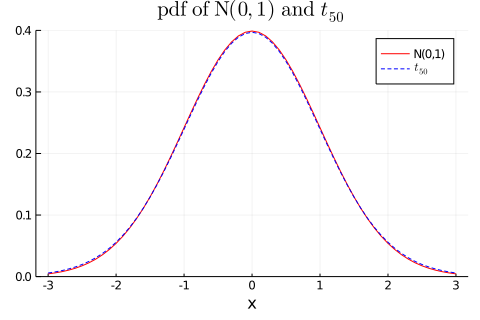

In [5]:
x  = -3:0.1:3

pdfN   = pdf.(Normal(0,1),x)
pdft50 = pdf.(TDist(50),x)

p1 = plot( x,[pdfN pdft50],
           linecolor = [:red :blue],
           linestyle = [:solid :dash],
           label = ["N(0,1)" L"t_{50}"],
           ylims = (0,0.4),
           title = L"\mathrm{pdf \ of \ N(0,1) \ and \ } t_{50}",
           xlabel = "x" )
display(p1)

## Cumulative Distribution Function (cdf)

and probabilities for different outcomes.

Notice that Distributions package wants Normal($\mu,\sigma$), not Normal($\mu,\sigma^2$).

In [6]:
printblue("Probability of:\n")
printlnPs("x<=-1.645 when x is N(0,1) ",cdf(Normal(0,1),-1.645))
printlnPs("x<=0 when x is N(0,1)      ",cdf(Normal(0,1),0))
printlnPs("2<x<=3 when x is N(0,2)    ",cdf(Normal(0,sqrt(2)),3)-cdf(Normal(0,sqrt(2)),2))
printlnPs("2<x<=3 when x is N(1,2)    ",cdf(Normal(1,sqrt(2)),3)-cdf(Normal(1,sqrt(2)),2))

printlnPs("\nx>4.61 when x is Chisq(2)  ",1-cdf(Chisq(2),4.61))
printlnPs("x>9.24 when x is Chisq(5)  ",1-cdf(Chisq(5),9.24))

Probability of:

x<=-1.645 when x is N(0,1)      0.050
x<=0 when x is N(0,1)           0.500
2<x<=3 when x is N(0,2)         0.062
2<x<=3 when x is N(1,2)         0.161

x>4.61 when x is Chisq(2)       0.100
x>9.24 when x is Chisq(5)       0.100


## Quantiles (percentiles)

...inverting the cdf

In [7]:
N05     = quantile(Normal(0,1),0.1)            #from the Distributions package
Chisq05 = quantile(Chisq(5),0.9)

printblue("\npercentiles:")
printlnPs("10th percentiles of a N(0,1)      ",N05)
printlnPs("90th percentiles of a Chisquare(5)",Chisq05)


percentiles:
10th percentiles of a N(0,1)          -1.282
90th percentiles of a Chisquare(5)     9.236


## Confidence Bands and t-tests

In [8]:
β = 0.5                                         #an estimate (a random variable)
σ = 0.15                                        #std of the estimate
confB = [(β-1.64*σ) (β+1.64*σ)]                 #confidence band of the estimate

printlnPs("90% confidence band:",confB)

90% confidence band:     0.254     0.746


In [9]:
tstat1 = (β - 0.4)/σ      #testing H₀: coefficient is 0.4
tstat2 = (β - 0.746)/σ    #testing H₀: coefficient is 0.746
tstat3 = (β - 1)/σ        #testing H₀: coefficient is 1.0

println("t-stats for different tests: are they beyond [-1.64,1.64]?")
printmat([tstat1 tstat2 tstat3])

t-stats for different tests: are they beyond [-1.64,1.64]?
     0.667    -1.640    -3.333



## Load Data from a csv File

In [10]:
x = readdlm("Data/FFmFactorsPs.csv",',',skipstart=1)

                #yearmonth, market, small minus big, high minus low
(ym,Rme,RSMB,RHML) = [x[:,i] for i=1:4] 
ym = round.(Int,ym)

println("Sample period: ",ym[1],"-",ym[end])

Sample period: 197901-201104


## Means and Standard Deviations

In [11]:
xbar = mean([Rme RHML],dims=1)    #,dims=1 to calculate average along a column
σ    = std([Rme RHML],dims=1)     #do \sigma[Tab] to get σ
T    = length(Rme)

printTable([xbar;σ],["Rme","HML"],["average","std"])

              Rme       HML
average     0.602     0.330
std         4.604     3.127



In [12]:
println("std of sample average (assuming iid data):\n")

printTable(σ/sqrt(T),["Rme","HML"],["std(average)"])

std of sample average (assuming iid data):

                   Rme       HML
std(average)     0.234     0.159



## Skewness, Kurtosis and Bera-Jarque

In [13]:
xStd     = (Rme .- mean(Rme))./std(Rme)
skewness = mean(xStd.^3)
kurtosis = mean(xStd.^4)

BJ     = (T/6)*skewness.^2 + (T/24)*(kurtosis.-3).^2  #Chisq(2)
pvalBJ = 1 .- cdf.(Chisq(2),BJ)

println("Testing skewness and kurtosis:\n")
printTable([skewness,kurtosis,BJ],["Rme"],["Skewness","Kurtosis","Bera-Jarque"])

Testing skewness and kurtosis:

                  Rme
Skewness       -0.806
Kurtosis        5.347
Bera-Jarque   131.128



## Covariances and Correlations

In [14]:
println("\ncov([Rme RHML]): ")
printmat(cov([Rme RHML]))

println("\ncor([Rme RHML]): ")
printmat(cor([Rme RHML]))

ρ = cor(Rme,RHML)
tstat = sqrt(T)*ρ/sqrt(1-ρ^2)

printlnPs("correlation and its t-stat:",ρ,tstat)


cov([Rme RHML]): 
    21.197    -4.875
    -4.875     9.775


cor([Rme RHML]): 
     1.000    -0.339
    -0.339     1.000

correlation and its t-stat:    -0.339    -7.090
